# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

# Decision trees

In [1]:
#import pandas as pd
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Week2/prepped_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_charge_ratio
customerID,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,0.033501
5575-GNVDE,34,1,1,1,56.95,1889.50,0,0.597015
3668-QPYBK,2,1,0,1,53.85,108.15,1,0.037140
7795-CFOCW,45,0,1,2,42.30,1840.75,0,1.063830
9237-HQITU,2,1,0,0,70.70,151.65,1,0.028289
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0,0.283019
2234-XADUH,72,1,1,3,103.20,7362.90,0,0.697674
4801-JZAZL,11,0,0,0,29.60,346.45,0,0.371622


In [3]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [4]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.993563044301401
0.7234525837592277


Accuracy on the train set is almost perfect at 99.4%
The test score is much lower at 72.3%. - Classic sign of overfitting

Let's see how deep the tree is and plot:

In [5]:
dt.get_depth()

32

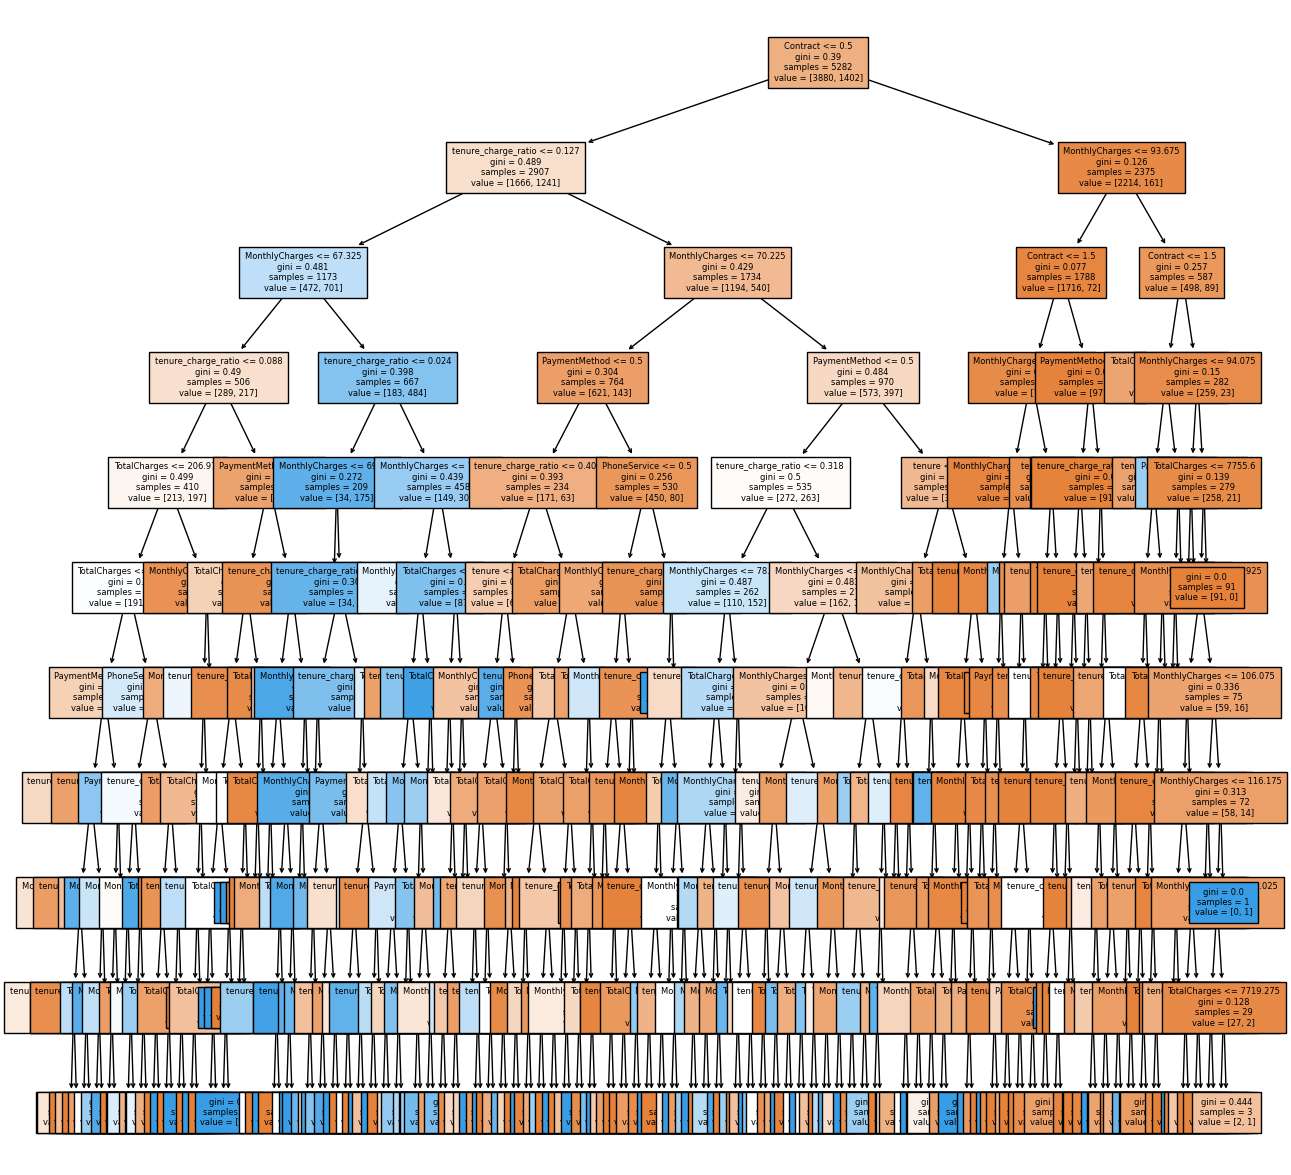

In [31]:
f = plt.figure(figsize=(15, 15))
_ = plot_tree(dt, fontsize=6, feature_names=features.columns, filled=True)

Seeing the overwhelming number of samples in the leaf nodes is evidence of overfitting. We will use max_depth to restrict the number of levels.

After trying various max_depth values, 20 looks to nearly equal the train/test scores and seems to eliminate the overfitting.

In [34]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7921241953805377
0.7773992049971608


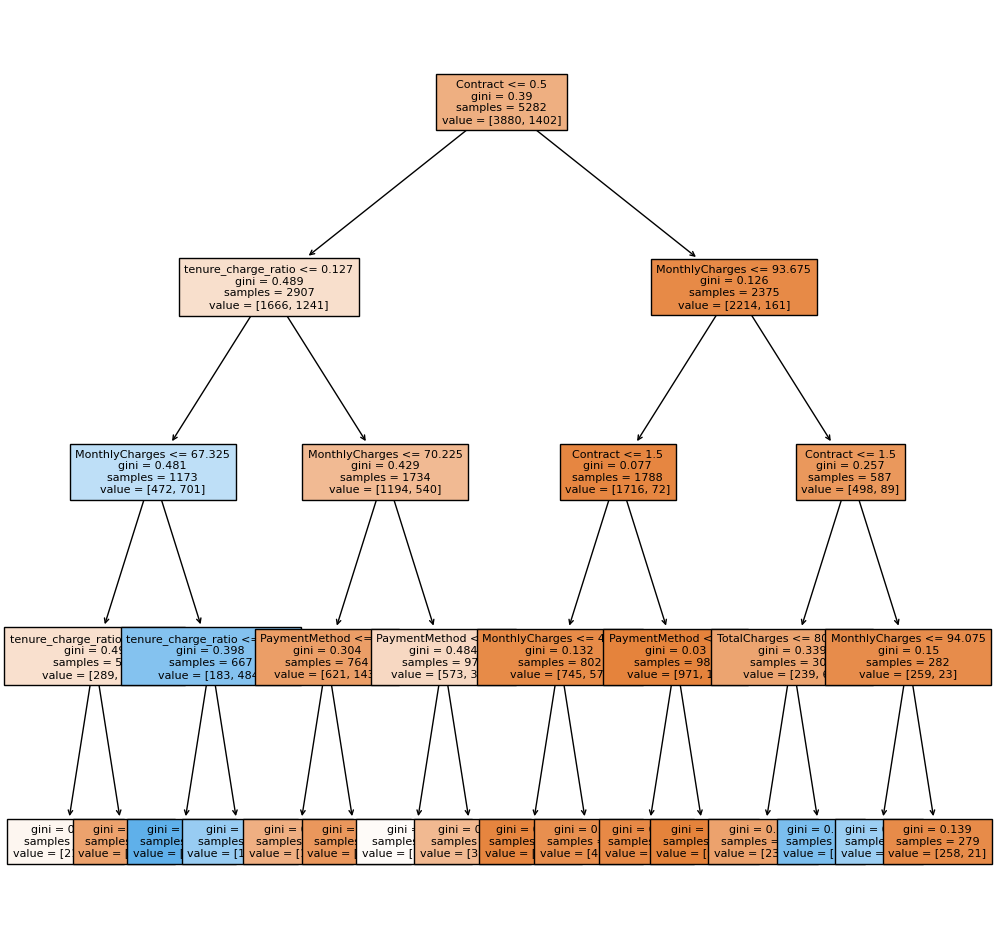

In [35]:
f = plt.figure(figsize=(12, 12))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

# Random Forests

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8057553956834532
0.7950028392958546


In [37]:
import math

math.sqrt(x_train.shape[1])

2.6457513110645907

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, max_features=10, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8091631957591822
0.7932992617830777


# Feature Selection

In [48]:
import seaborn as sns

<Axes: >

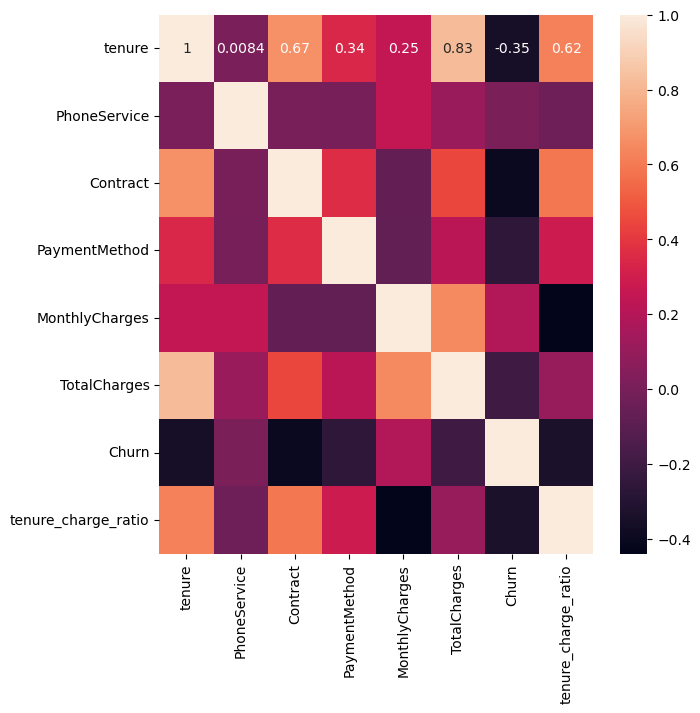

In [52]:
f = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True)

<Axes: title={'center': 'Feature Importance'}>

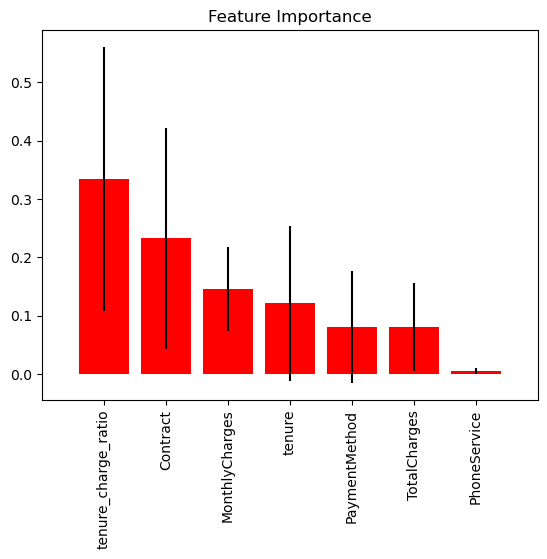

In [56]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

In [63]:
new_features = features.drop(['PhoneService', 'TotalCharges', 'PaymentMethod','tenure'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [73]:
rfc = RandomForestClassifier(max_depth=4, max_features=8, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.797235895494131
0.7864849517319704


<Axes: title={'center': 'Feature Importance'}>

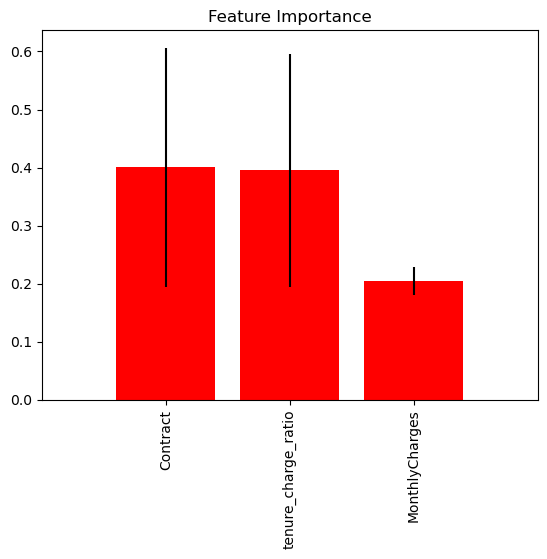

In [70]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

# Summary

Performance didn't change much, but our feature importances did. The contract measurement seems to be very important for predicting churn.